<a href="https://colab.research.google.com/github/RishabhMehra/Machine-Learning-with-Python-/blob/Data/Classification_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SAHeart Disease 

Questions 1 to 10

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import files
import io
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/harpreetSinghGuller/Data-Science-R/master/SAHeart.csv'

df = pd.read_csv(url)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [ ]:
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
df.drop('row.names',axis=1,inplace=True)

In [ ]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
X_features = df.columns.to_list()
X_features.remove('chd')
X_features

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age']

1. Build Logsitic regression model with all features

In [ ]:
encoded_df  = pd.get_dummies(df[X_features],drop_first=True)

encoded_df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol',
       'age', 'famhist_Present'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
Y = df.chd
X = sm.add_constant(encoded_df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
logist = sm.Logit(y_train,X_train)
logist_model1 = logist.fit()

Optimization terminated successfully.
         Current function value: 0.515459
         Iterations 6


In [ ]:
logist_model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.199     
Dependent Variable: chd              AIC:              352.9863  
Date:               2021-04-29 12:39 BIC:              390.7628  
No. Observations:   323              Log-Likelihood:   -166.49   
Df Model:           9                LL-Null:          -207.83   
Df Residuals:       313              LLR p-value:      4.7595e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -6.5732   1.5863 -4.1437 0.0000 -9.6823 -3.4640
sbp                0.0097   0.0068  1.4272 0.1535 -0.0036  0.0230
tobacco            0.0619   0.0319  1.9390 0.0525 -0.0007  0.1245
ldl                0.2067   0.0717  2.8837 0.0039  0.0662  0.3472
adiposity          0.0262   0.0347  0.7554 0.4500 -0.0418  0.0942
typea              0.0387   0.0149  2.5972 0.0094  0.0095  0.0679
obesity           -0.0646   0.0510 -1.2661 0.2055 -0.1645  0.0354
alcohol            0.0011   0.0063  0.1777 0.8590 -0.0113  0.0135
age                0.0415   0.0143  2.9071 0.0036  0.0135  0.0696
famhist_Present    0.7519   0.2731  2.7533 0.0059  0.2167  1.2872
=================================================================

"""

In [ ]:
def get_significant_vars(lm):
  sigvars_df = pd.DataFrame(lm.pvalues)
  sigvars_df['vars'] = sigvars_df.index
  sigvars_df.columns =['pvalues','vars']
  return list(sigvars_df[sigvars_df['pvalues']<=0.05]['vars'])

In [ ]:
significant_vars_lm = get_significant_vars(logist_model1)
significant_vars_lm

['const', 'ldl', 'typea', 'age', 'famhist_Present']

In [ ]:
significant_vars_lm.remove('const')

In [ ]:
#model for significant values
Y = df.chd
X = sm.add_constant(encoded_df[significant_vars_lm])

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)


In [ ]:
logist2 = sm.Logit(y_train,X_train)
logist_model2 = logist2.fit()

Optimization terminated successfully.
         Current function value: 0.528087
         Iterations 6


In [ ]:
logist_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.179     
Dependent Variable: chd              AIC:              351.1443  
Date:               2021-04-29 12:39 BIC:              370.0326  
No. Observations:   323              Log-Likelihood:   -170.57   
Df Model:           4                LL-Null:          -207.83   
Df Residuals:       318              LLR p-value:      2.5286e-15
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -6.6526   1.1139 -5.9723 0.0000 -8.8358 -4.4694
ldl                0.2028   0.0648  3.1320 0.0017  0.0759  0.3298
typea              0.0372   0.0145  2.5625 0.0104  0.0088  0.0657
age                0.0592   0.0111  5.3278 0.0000  0.0374  0.0809
famhist_Present    0.7004   0.2666  2.6275 0.0086  0.1779  1.2228
=================================================================

"""

In [ ]:
y_pred = pd.DataFrame({"actual":y_test,
                       "predicted_prob":logist_model2.predict(sm.add_constant(X_test[significant_vars_lm]))})

In [ ]:
y_pred.sample(10,random_state=42)

,actual,predicted_prob
29,1,0.657565
357,0,0.465959
447,0,0.067349
5,0,0.582238
209,0,0.598367
76,0,0.406939
75,0,0.180435
296,0,0.094291
428,0,0.247063
227,1,0.223939


In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_pred['actual'], y_pred['predicted_prob'], pos_label=1)

In [ ]:
tpr_fpr = pd.DataFrame({'tpr' : tpr,
                        'fpr' :fpr,
                        'threshold' :thresholds
})

tpr_fpr['Diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values('Diff',ascending  = False)[0:5]

,tpr,fpr,threshold,Diff
20,0.591837,0.155556,0.434413,0.436281
22,0.612245,0.177778,0.421181,0.434467
24,0.632653,0.200000,0.414076,0.432653
26,0.653061,0.222222,0.405464,0.430839
21,0.591837,0.177778,0.423902,0.414059


In [ ]:
thresholds.sort()
thresholds

array([0.02080645, 0.06953277, 0.07146994, 0.13759534, 0.1493417 ,
       0.18517956, 0.18821626, 0.18853688, 0.19278218, 0.21438054,
       0.23585541, 0.23919652, 0.24706301, 0.25404701, 0.25443471,
       0.28071653, 0.28488079, 0.28492855, 0.2876492 , 0.29456067,
       0.30324361, 0.31727308, 0.31760969, 0.32211483, 0.33957203,
       0.40546377, 0.40693882, 0.41407599, 0.41620211, 0.42118054,
       0.42390181, 0.43441255, 0.46595932, 0.4676967 , 0.47543682,
       0.50778075, 0.53132544, 0.54418781, 0.56457962, 0.56540116,
       0.58223769, 0.58556351, 0.59286433, 0.59769427, 0.59836654,
       0.61735803, 0.64783381, 0.65756472, 0.8307413 , 0.83166895,
       0.85451101, 1.85451101])

In [ ]:
tpr_fpr.sort_values('Diff',ascending  = False,inplace=True)

tpr_fpr.head(1)

,tpr,fpr,threshold,Diff
20,0.591837,0.155556,0.434413,0.436281


In [ ]:
new_threshold = tpr_fpr.iloc[0]['threshold']

In [ ]:
y_pred['valueOn_newThreshold']  = y_pred.predicted_prob.map(lambda x : 1 if x> new_threshold else 0)

In [ ]:
y_pred.sample(10,random_state=42)

,actual,predicted_prob,valueOn_newThreshold
29,1,0.657565,1
357,0,0.465959,1
447,0,0.067349,0
5,0,0.582238,1
209,0,0.598367,1
76,0,0.406939,0
75,0,0.180435,0
296,0,0.094291,0
428,0,0.247063,0
227,1,0.223939,0


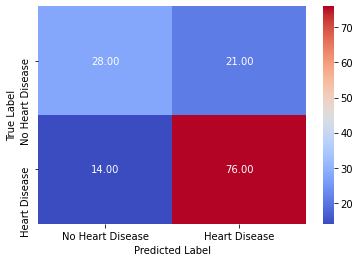

In [ ]:
cm = metrics.confusion_matrix(y_pred['actual'],y_pred['valueOn_newThreshold'],[1,0])
sn.heatmap(cm,annot=True , fmt= '.2f',cmap='coolwarm',
           xticklabels = ["No Heart Disease","Heart Disease"],
           yticklabels = ["No Heart Disease","Heart Disease"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
def get_total_cost( actual,predicted,cost_FPs,cost_FNs):
  cm = metrics.confusion_matrix(actual,predicted,[1,0])
  cm_mat = np.array(cm)
  return cm_mat[0,1]*cost_FNs +cm_mat[1,0]*cost_FPs

cost_df = pd.DataFrame(columns = ['prob','cost'])

In [ ]:
idx= 0

for each_prob in range(10,50) :
  cost = get_total_cost(y_pred.actual,y_pred.predicted_prob.map(lambda x: 1 if x>(each_prob/100) else 0),1,5)
  cost_df.loc[idx] = [each_prob/100,cost]
  idx+=1

In [ ]:
cost_df.sort_values('cost',ascending=True)[0:5]

,prob,cost
3,0.13,66.0
2,0.12,68.0
7,0.17,69.0
8,0.18,69.0
1,0.11,70.0


In [ ]:
y_pred['cost_prediction'] = y_pred.predicted_prob.map(lambda x : 1 if x >0.13 else 0)

In [ ]:
print(metrics.classification_report(y_pred.actual,y_pred.cost_prediction))

              precision    recall  f1-score   support

           0       0.97      0.32      0.48        90
           1       0.44      0.98      0.61        49

    accuracy                           0.55       139
   macro avg       0.70      0.65      0.55       139
weighted avg       0.78      0.55      0.53       139



In [ ]:
print(metrics.classification_report(y_pred.actual,y_pred.valueOn_newThreshold))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        90
           1       0.67      0.57      0.62        49

    accuracy                           0.75       139
   macro avg       0.73      0.71      0.71       139
weighted avg       0.74      0.75      0.74       139



Decision Tree

In [ ]:
Y = df.chd
X = encoded_df


X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion ='gini',max_depth =4)
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_predict = clf_tree.predict(X_test)
metrics.roc_auc_score(y_test,tree_predict)

0.5901360544217686

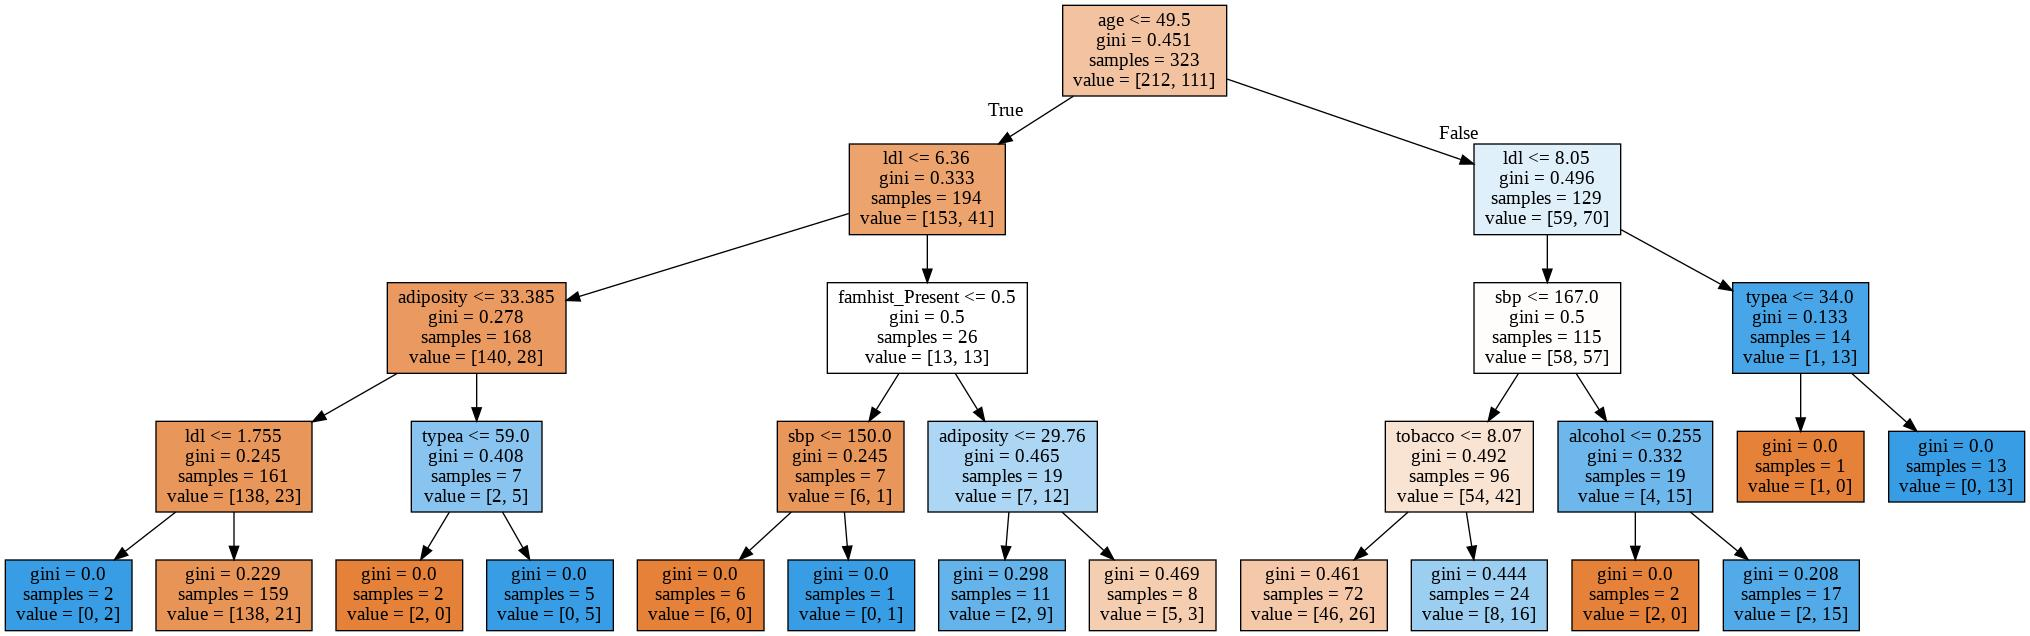

In [ ]:
#Display Decision Tree

from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

export_graphviz(clf_tree,
                out_file= 'chd_tree.odt',
                feature_names = X_train.columns,
                filled = True)

chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree.odt')
chd_tree_graph.write_jpg('chd_tree.png')

Image(filename = 'chd_tree.png')

In [ ]:
from  sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion' : ['gini','entropy'],
                     'max_depth': range(3,10)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,tuned_parameters,cv=10,scoring='roc_auc')

clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                 

In [ ]:
clf.best_score_

0.6244244391971665

In [ ]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 3}